In [1]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms as T

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [4]:
transform = T.Compose([
    T.ToTensor(),
    T.Resize((32,32)),
    T.Normalize((0.1037,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST("MNIST", train=True, transform=transform, download=True)
val_dataset = torchvision.datasets.MNIST("MNIST", train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1024, shuffle=False, num_workers=4 )

100%|██████████| 9.91M/9.91M [00:10<00:00, 927kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 224kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 742kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.20MB/s]


In [9]:
images, labels = next(iter(train_loader))
images.shape

torch.Size([32, 1, 32, 32])

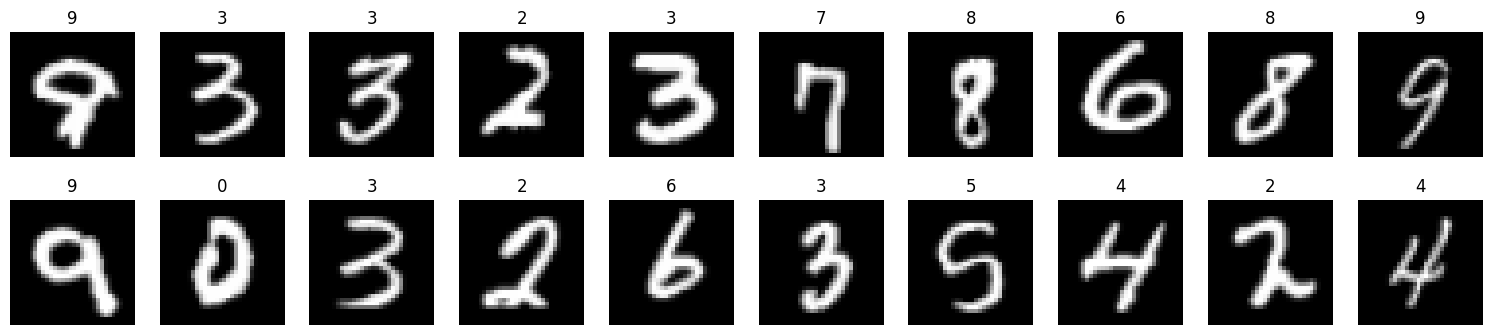

In [16]:
cols = 10
rows = 2
fig = plt.figure(figsize=(2*cols - 1, 2*rows))
k = 0
for i in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, i*rows + j + 1)
        ax.imshow(np.transpose(images[k], (1,2,0)), cmap='gray')
        ax.axis('off')
        ax.grid("off")
        ax.set_title(labels[k].item())
        k+=1
plt.show()

In [18]:
def train_epoch(model, optimizer, criterion):
    loss_log, acc_log = [], []
    model.train()
    for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
        x_batch.to(device)
        y_batch.to(device)
        
        optimizer.zero_grad()
        logits = model(x_batch)
        loss = criterion(logits, y_batch)
        loss.bacward()
        optimizer.step()
        
        loss_log.append(loss.item())
        pred = torch.max(logits, dim=1)[1].numpy()
        acc = np.mean(pred == y_batch.numpy())
        acc_log.append(acc)
    return loss_log, acc_log

In [ ]:
def test(model, criterion):
    acc_log, loss_log = [], []
    model.eval()
    for batch_idx, (x_batch, y_batch) in enumerate(val_loader):
        x_batch.to(device)
        y_batch.to(device)
        
        with torch.no_grad():
            logits = model(x_batch)
            loss = criterion(logits, y_batch)
        
        loss_log.append(loss.item())
        pred = torch.max(logits, 1)[1].numpy()
        acc = np.mean(pred == y_batch.numpy())
        acc_log.append(acc)
    return loss_log, acc_log